<a href="https://colab.research.google.com/github/renomrcll/data-pipeline-practice/blob/main/Data_Pipeline_Kelompok_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA PIPELINE USING ETL**



*   Reno Marcello Mohammad - 19/439821/TK/48551
*   Fauzan Abdillah - 19/444049/TK/49245 
*   Kisbayu Kresna Aji - 19/444056/TK/49252
*   Harits Rizkal Aliamdy - 19/439814/TK/48544



Dataset pertama yang kami gunakan merupakan dataset berisi informasi film dari situs Netflix yaitu netflix_df, dan untuk dataset yang kedua kami mengambil data dari API IMDB yaitu Top 250 Movies dan Top 250 TV Series yang digabungkan kedalam satu dataframe yaitu imdb_df. Dengan kedua dataset tersebut kami akan mencari hubungan antara kedua dataset tersebut.

Pada pemrosesan data ini kami menggunakan pandas sebagai pengolahan dataframenya

**IMPORT DRIVE & LIBRARY**

Mengimport library serta drive untuk mengambil dataset dari drive

In [ ]:
import pandas as pd
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive,files
sns.set_theme(style="whitegrid")
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Fungsi untuk mengambil data film dari API

In [ ]:
def get_movies(url):
  response = requests.get(url)
  body = response.json()['items']
  return body

In [ ]:
imdb_data = []
imdb_data += get_movies("https://imdb-api.com/en/API/Top250TVs/k_1t88ytnw")
imdb_data += get_movies("https://imdb-api.com/en/API/Top250Movies/k_1t88ytnw")

Membuat dataframe dari dataset IMDB 

In [ ]:
imdb_df = pd.DataFrame(imdb_data)
imdb_df.head()

,id,rank,title,fullTitle,year,image,crew,imDbRating,imDbRatingCount
0,tt5491994,1,Planet Earth II,Planet Earth II (2016),2016,https://m.media-amazon.com/images/M/MV5BZWYxOD...,"David Attenborough, Elizabeth White",9.5,106505
1,tt0795176,2,Planet Earth,Planet Earth (2006),2006,https://m.media-amazon.com/images/M/MV5BNmZlYz...,"David Attenborough, Sigourney Weaver",9.4,175205
2,tt0903747,3,Breaking Bad,Breaking Bad (2008),2008,https://m.media-amazon.com/images/M/MV5BMjhiMz...,"Bryan Cranston, Aaron Paul",9.4,1613122
3,tt0185906,4,Band of Brothers,Band of Brothers (2001),2001,https://m.media-amazon.com/images/M/MV5BMTI3OD...,"Scott Grimes, Damian Lewis",9.4,405616
4,tt7366338,5,Chernobyl,Chernobyl (2019),2019,https://m.media-amazon.com/images/M/MV5BZGQ2Ym...,"Jessie Buckley, Jared Harris",9.3,628890


Karena tulisan pada kolom dataset tersebut mengandung uppercase, maka akan disetarakan dengan .lower() terlebih dahulu

In [ ]:
imdb_df.columns = imdb_df.columns.str.lower()

Lalu kami melakukan drop terhadap kolom yang tidak digunakan pada pengolahan data disini

In [ ]:
unnecessary_columns = ['fulltitle', 'rank', 'id', 'image', 'imdbratingcount']
imdb_df.drop(unnecessary_columns, axis='columns', inplace=True)
imdb_df = imdb_df.reset_index(drop=True)
imdb_df.head()

,title,year,crew,imdbrating
0,Planet Earth II,2016,"David Attenborough, Elizabeth White",9.5
1,Planet Earth,2006,"David Attenborough, Sigourney Weaver",9.4
2,Breaking Bad,2008,"Bryan Cranston, Aaron Paul",9.4
3,Band of Brothers,2001,"Scott Grimes, Damian Lewis",9.4
4,Chernobyl,2019,"Jessie Buckley, Jared Harris",9.3


In [ ]:
imdb_df.shape

(500, 4)

Terdapat 500 baris dan 4 kolom pada dataframe imdb_df


**DATASET NETFLIX**

In [ ]:
netflix_df = pd.read_csv("/content/drive/Shareddrives/RekDat/netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Karena masih banyak data yang mengandung null atau NaN, maka dilakukan **Data Cleaning** terlebih dahulu

Lalu kita isi kolom yang kosong dengan "... Unknown", dan mengubah listed_in menjadi genre agar lebih familiar

In [ ]:
netflix_df['director'] = netflix_df['director'].fillna('Director_Unknown')
netflix_df['country'] = netflix_df['country'].fillna('Country_Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Cast_Unknown')
netflix_df['duration'] = netflix_df['duration'].fillna('Runtime_Unknown')
netflix_df=netflix_df.rename(columns={'listed_in': 'genre'})
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast_Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director_Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country_Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director_Unknown,Cast_Unknown,Country_Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director_Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Melakukan drop pada kolom yang tidak dibutuhkan

In [ ]:
netflix_df.drop(['date_added','show_id'], axis='columns', inplace=True)
netflix_df.shape

(8807, 10)

**NETFLIX IN IMDB**

Mencari film netflix pada netflix_df yang terdapat pada imdb_df lalu dimasukkan kedalam netflix_in_imdb

In [ ]:
mask = netflix_df['title'].apply(lambda x: ''.join(e for e in x if e.isalnum()).lower()).isin(imdb_df['title'].apply(lambda x: ''.join(e for e in x if e.isalnum()).lower()))
netflix_in_imdb = netflix_df.loc[mask]

Melakukan drop terhadap baris yang terduplikat

In [ ]:
imdb_df = imdb_df.drop_duplicates(subset='title')

Menyimpan title kedalam list

In [ ]:
origin_netflix_title = netflix_in_imdb['title'].to_list()
origin_imdb_title = imdb_df['title'].to_list()

Memodifikasi judul film pada kedua dataframe menjadi lowercase dan tanpa spasi agar menambah akurasi pada saat melakukan join 

In [ ]:
netflix_in_imdb['title'] = netflix_in_imdb['title'].apply(lambda x: ''.join(e for e in x if e.isalnum()).lower())
imdb_df['title'] = imdb_df['title'].apply(lambda x: ''.join(e for e in x if e.isalnum()).lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Melakukan join netflix_in_imdb dengan imdb_df berdasarkan dengan kolom title

In [ ]:
netflix_in_imdb = netflix_in_imdb.merge(imdb_df, on='title')
netflix_in_imdb.shape

(132, 13)

Dari 8807 film yang ada di netflix, hanya terdapat 133 film netflix yang ada pada top 250 movies dan top 250 tv series versi IMDB.

Mengembalikan kolom title menjadi seperti awal

In [ ]:
netflix_in_imdb['title'] = origin_netflix_title
imdb_df['title'] = origin_imdb_title
netflix_in_imdb.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,title,director,cast,country,release_year,rating,duration,genre,description,year,crew,imdbrating
0,TV Show,Kota Factory,Director_Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2019,"Mayur More, Jitendra Kumar",8.7
1,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,1984,"Sergio Leone (dir.), Robert De Niro, James Woods",8.3
2,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,2002,"Steven Spielberg (dir.), Leonardo DiCaprio, To...",8.1
3,TV Show,Friday Night Lights,Director_Unknown,"Kyle Chandler, Connie Britton, Aimee Teegarden...",Country_Unknown,2010,TV-14,5 Seasons,"TV Dramas, Teen TV Shows",Eric Taylor faces enormous pressure when he si...,2006,"Kyle Chandler, Connie Britton",8.6
4,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,2010,"Christopher Nolan (dir.), Leonardo DiCaprio, J...",8.7


Menghapus kolom yang tidak diperlukan 

In [ ]:
netflix_in_imdb.drop(['year','crew'], axis='columns', inplace=True)
netflix_in_imdb.head()

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
0,TV Show,Kota Factory,Director_Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8.7
1,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,8.3
2,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,8.1
3,TV Show,Friday Night Lights,Director_Unknown,"Kyle Chandler, Connie Britton, Aimee Teegarden...",Country_Unknown,2010,TV-14,5 Seasons,"TV Dramas, Teen TV Shows",Eric Taylor faces enormous pressure when he si...,8.6
4,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,8.7


Mengecek kembali apakah ada nilai null atau tidak pada dataframe netflix_in_imdb

In [ ]:
netflix_in_imdb.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
genre           0
description     0
imdbrating      0
dtype: int64

Proses load dataframe kedalam file .csv

In [ ]:
netflix_in_imdb.to_csv('/content/drive/Shareddrives/RekDat/Output/netflix_in_imdb.csv')
#Mendownload file .csv ke local file
#files.download("/content/drive/Shareddrives/RekDat/Output/netflix_in_imdb.csv") 

Mengurutkan Film dengan rating terbesar (leaderboard)

In [ ]:
netflix_in_imdb = netflix_in_imdb.sort_values(by="imdbrating",ascending=False).reset_index(drop=True)
netflix_in_imdb.index +=1

**Urutan 10 film pertama berdasarkan Rating Terbesar**

In [ ]:
netflix_in_imdb.head(10)

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
1,TV Show,Planet Earth II,Director_Unknown,David Attenborough,United Kingdom,2016,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV","In this sequel to the Emmy-winning ""Planet Ear...",9.5
2,TV Show,Breaking Bad,Director_Unknown,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,9.4
3,TV Show,Blue Planet II,Director_Unknown,David Attenborough,United Kingdom,2017,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,9.3
4,TV Show,Our Planet,Director_Unknown,David Attenborough,"United States, United Kingdom",2019,TV-PG,1 Season,"Docuseries, Science & Nature TV",Experience our planet's natural beauty and exa...,9.2
5,TV Show,Avatar: The Last Airbender,Director_Unknown,"Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...",United States,2007,TV-Y7,3 Seasons,"Classic & Cult TV, Kids' TV, TV Action & Adven...",Siblings Katara and Sokka wake young Aang from...,9.2
6,TV Show,The Last Dance,Director_Unknown,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...,9.1
7,TV Show,Life,Director_Unknown,"Lee Dong-wook, Cho Seung-woo, Won Jin-ah, Lee ...",South Korea,2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","At Korea's top university medical center, idea...",9.1
8,TV Show,Sherlock,Director_Unknown,"Benedict Cumberbatch, Martin Freeman, Una Stub...","United Kingdom, United States",2017,TV-14,4 Seasons,"British TV Shows, Crime TV Shows, Internationa...",In this updated take on Sir Arthur Conan Doyle...,9.0
9,TV Show,Fullmetal Alchemist: Brotherhood,Yasuhiro Irie,"Romi Park, Rie Kugimiya, Megumi Takamoto, Shin...",Japan,2010,TV-14,5 Seasons,"Anime Series, International TV Shows",After both suffer physical damage – brothers E...,9.0
10,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,8.9


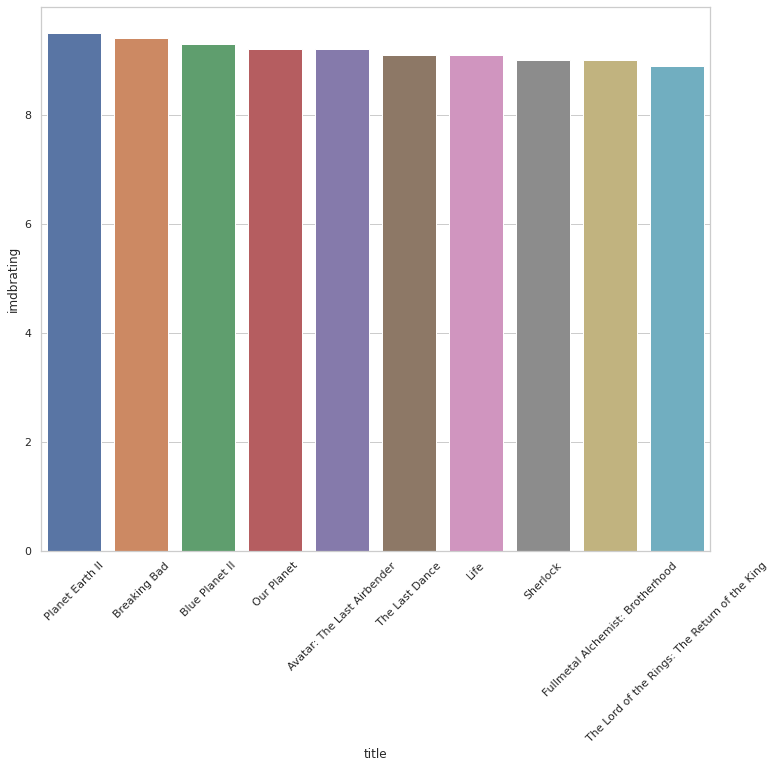

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=netflix_in_imdb['title'].head(10), y=netflix_in_imdb['imdbrating'].head(10).astype(float))
plt.xticks(rotation=45)
plt.show()

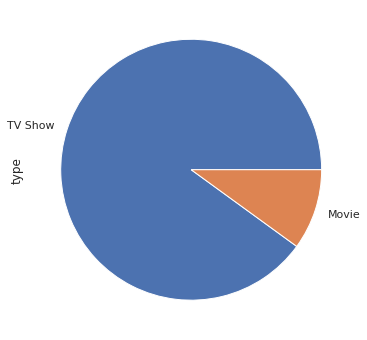

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
netflix_in_imdb['type'].head(10).value_counts().plot(kind='pie')

**Urutan 10 film pertama berdasarkan Rating Terkecil**

In [ ]:
netflix_in_imdb.sort_values(by="imdbrating",ascending=True).head(10)

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
132,Movie,Rocky,John G. Avildsen,"Sylvester Stallone, Talia Shire, Burt Young, C...",United States,1976,PG,120 min,"Action & Adventure, Classic Movies, Dramas",Sylvester Stallone shot to fame as Rocky Balbo...,8.0
125,Movie,Cool Hand Luke,Stuart Rosenberg,"Paul Newman, George Kennedy, J.D. Cannon, Lou ...",United States,1967,TV-14,127 min,"Classic Movies, Dramas","Luke Jackson likes to do things his own way, w...",8.0
126,Movie,Spotlight,Tom McCarthy,"Mark Ruffalo, Michael Keaton, Rachel McAdams, ...",United States,2015,R,129 min,"Dramas, Independent Movies",A team of reporters and editors at the Boston ...,8.0
127,Movie,Into the Wild,Sean Penn,"Emile Hirsch, Marcia Gay Harden, William Hurt,...",United States,2007,R,148 min,"Action & Adventure, Dramas, Independent Movies",A young man gives up everything – including hi...,8.0
131,Movie,Rebecca,Ben Wheatley,"Lily James, Armie Hammer, Kristin Scott Thomas...",United Kingdom,2020,PG-13,123 min,"Dramas, Romantic Movies, Thrillers",A young newlywed moves to her husband's imposi...,8.0
129,Movie,Platoon,Oliver Stone,"Tom Berenger, Willem Dafoe, Charlie Sheen, For...","United States, United Kingdom",1986,R,120 min,"Action & Adventure, Classic Movies, Dramas",A soldier grows disillusioned as he's caught b...,8.0
130,Movie,Rush,Ron Howard,"Chris Hemsworth, Daniel Brühl, Olivia Wilde, A...","United Kingdom, Germany, United States",2013,R,123 min,"Action & Adventure, Dramas, International Movies","In the 1970s, a rivalry propels race car drive...",8.0
128,Movie,Hachi: A Dog's Tale,Lasse Hallström,"Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa...","United Kingdom, United States",2009,G,93 min,"Children & Family Movies, Dramas","When his master dies, a loyal pooch named Hach...",8.0
111,Movie,Trainspotting,Danny Boyle,"Ewan McGregor, Ewen Bremner, Jonny Lee Miller,...",United Kingdom,1996,R,94 min,"Comedies, Cult Movies, Dramas",Renton and his mates cope with the gritty real...,8.1
112,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,8.1


**Urutan 10 TV Series pertama berdasarkan Rating Terbesar**

In [ ]:
netflix_in_imdb.sort_values(by=["type","imdbrating"],ascending=False).head(10)

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
1,TV Show,Planet Earth II,Director_Unknown,David Attenborough,United Kingdom,2016,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV","In this sequel to the Emmy-winning ""Planet Ear...",9.5
2,TV Show,Breaking Bad,Director_Unknown,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,9.4
3,TV Show,Blue Planet II,Director_Unknown,David Attenborough,United Kingdom,2017,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,9.3
4,TV Show,Our Planet,Director_Unknown,David Attenborough,"United States, United Kingdom",2019,TV-PG,1 Season,"Docuseries, Science & Nature TV",Experience our planet's natural beauty and exa...,9.2
5,TV Show,Avatar: The Last Airbender,Director_Unknown,"Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...",United States,2007,TV-Y7,3 Seasons,"Classic & Cult TV, Kids' TV, TV Action & Adven...",Siblings Katara and Sokka wake young Aang from...,9.2
6,TV Show,The Last Dance,Director_Unknown,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...,9.1
7,TV Show,Life,Director_Unknown,"Lee Dong-wook, Cho Seung-woo, Won Jin-ah, Lee ...",South Korea,2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","At Korea's top university medical center, idea...",9.1
8,TV Show,Sherlock,Director_Unknown,"Benedict Cumberbatch, Martin Freeman, Una Stub...","United Kingdom, United States",2017,TV-14,4 Seasons,"British TV Shows, Crime TV Shows, Internationa...",In this updated take on Sir Arthur Conan Doyle...,9.0
9,TV Show,Fullmetal Alchemist: Brotherhood,Yasuhiro Irie,"Romi Park, Rie Kugimiya, Megumi Takamoto, Shin...",Japan,2010,TV-14,5 Seasons,"Anime Series, International TV Shows",After both suffer physical damage – brothers E...,9.0
11,TV Show,Persona,"Lee Kyoungmi, Yim Pilsung, Jeon Go-woon, Kim J...","Lee Ji-eun (IU), Bae Doona, Park Hae Soo, Kim ...",South Korea,2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr...",An exploration of different personas in an ecl...,8.9


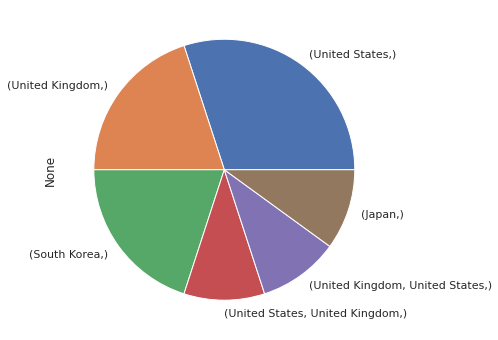

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
netflix_in_imdb.sort_values(by=["type","imdbrating"],ascending=False).head(10).value_counts(['country']).plot(kind='pie')

**Urutan 10 Movie pertama berdasarkan Rating Terbesar**

In [ ]:
netflix_in_imdb.loc[netflix_in_imdb['type'].isin(['Movie'])].sort_values(by='imdbrating',ascending=False).head(10)

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
10,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,8.9
14,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,8.9
13,Movie,Death Note,Adam Wingard,"Willem Dafoe, Nat Wolff, Lakeith Stanfield, Ma...",United States,2017,TV-MA,100 min,"Horror Movies, Thrillers",Light Turner finds a supernatural notebook and...,8.9
18,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,8.8
35,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,8.7
36,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,8.7
38,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,8.6
39,Movie,The Bridge,Kunle Afolayan,"Chidinma Ekile, Ademola Adedoyin, Kunle Afolay...",Nigeria,2017,TV-14,119 min,"Dramas, International Movies, Romantic Movies",A Yoruba prince and a young lady from a promin...,8.6
40,Movie,City of God,"Fernando Meirelles, Katia Lund","Alexandre Rodrigues, Leandro Firmino, Phellipe...","Brazil, France, Germany",2002,R,130 min,"Dramas, Independent Movies, International Movies","Growing up in a Rio de Janeiro slum, Rocket is...",8.6
43,Movie,Mahabharat,Amaan Khan,"Amitabh Bachchan, Ajay Devgn, Vidya Balan, Sha...",India,2013,TV-14,119 min,"Action & Adventure, Dramas, International Movies",Two young brothers encounter a singing bird wh...,8.6


**Urutan 10 film terbaru dengan Rating terbesar**

In [ ]:
netflix_in_imdb.loc[netflix_in_imdb['release_year'].isin([2021,2020])].sort_values(by='imdbrating',ascending=False).head(10)

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
6,TV Show,The Last Dance,Director_Unknown,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...,9.1
24,TV Show,Dark,Director_Unknown,"Louis Hofmann, Oliver Masucci, Jördis Triebel,...","Germany, United States",2020,TV-MA,3 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A missing child sets four families on a franti...,8.7
28,TV Show,BoJack Horseman,Director_Unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,8.7
29,TV Show,Kota Factory,Director_Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8.7
50,Movie,Monster,Anthony Mandler,"Kelvin Harrison Jr., Jennifer Hudson, Jeffrey ...",United States,2021,TV-MA,99 min,Dramas,A talented teen implicated in a robbery-turned...,8.6
51,TV Show,The Crown,Director_Unknown,"Claire Foy, John Lithgow, Matt Smith, Vanessa ...","United Kingdom, United States",2020,TV-MA,4 Seasons,"British TV Shows, International TV Shows, TV D...",This drama follows the political rivalries and...,8.6
53,TV Show,Formula 1: Drive to Survive,Director_Unknown,Cast_Unknown,United Kingdom,2021,TV-MA,3 Seasons,Docuseries,"Drivers, managers and team owners live life in...",8.6
66,TV Show,Cobra Kai,Director_Unknown,"Ralph Macchio, William Zabka, Xolo Maridueña, ...",United States,2021,TV-14,3 Seasons,"TV Action & Adventure, TV Comedies, TV Dramas",Decades after the tournament that changed thei...,8.5
69,TV Show,The Queen's Gambit,Director_Unknown,"Anya Taylor-Joy, Bill Camp, Marielle Heller, T...",United States,2020,TV-MA,1 Season,TV Dramas,"In a 1950s orphanage, a young girl reveals an ...",8.5
76,Movie,Psycho,Mysskin,"Udhayanidhi Stalin, Aditi Rao Hydari, Nithya M...",India,2020,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",As a visually impaired man attempts to rescue ...,8.5


**TV Series dengan skor terkecil**

In [ ]:
netflix_in_imdb.sort_values(by=["type","imdbrating"],ascending=True).head(1)

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
125,Movie,Cool Hand Luke,Stuart Rosenberg,"Paul Newman, George Kennedy, J.D. Cannon, Lou ...",United States,1967,TV-14,127 min,"Classic Movies, Dramas","Luke Jackson likes to do things his own way, w...",8.0


**Movie dengan skor terkecil**

In [ ]:
netflix_in_imdb.sort_values(by=["type","imdbrating"],ascending=[False,True]).head(1)

,type,title,director,cast,country,release_year,rating,duration,genre,description,imdbrating
122,TV Show,Warrior,Director_Unknown,"Dar Salim, Danica Curcic, Lars Ranthe, Marco I...",Denmark,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A war veteran plagued by guilt over his final ...,8.1


Dari data top 500 IMDB, terdapat 133 yang merupakan film Netflix, maka dapat ditarik kesimpulan bahwa kualitas film Netflix terbilang bagus.

Lalu dari pengolahan data yang ditampilkan tersebut juga dapat ditarik kesimpulan bahwa Netizen atau Warga Internet lebih menyukai TV Series daripada Movie, karena pada top 10 film berdasarkan skor tertingginya semua berisi TV Series, dengan skor terbesarnya yaitu 9.5. Sedangkan top 10 Movie berada pada urutan dari 11-44 pada leaderboard dengan skor terbesar yaitu 8.9.

Kemudian Dari data ini juga dapat dilihat bahwa film hollywood atau film barat lebih banyak digemari karena 8 dari 10 top 10 film maupun top 10 terbaru merupakan produksi US atau UK dan 2 lainnya adalah Asia.